<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.948717,64.710086,-3.083554,118.575249,121.517912,-2.942664
1,0.0,1.0,40.473606,86.353412,-0.787630,136.039388,136.751626,-0.712238
2,0.0,2.0,72.168345,80.109871,-0.529620,161.748596,162.354837,-0.606241
3,0.0,3.0,93.928889,75.244213,2.252833,181.425935,179.351345,2.074590
4,0.0,4.0,66.749330,58.889803,-0.432311,135.206822,135.584110,-0.377287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.680320,85.824644,1.524189,127.029153,125.682193,1.346960
19996,999.0,16.0,27.747163,88.912083,0.019996,126.679242,126.819063,-0.139821
19997,999.0,17.0,88.824577,72.168839,-0.657843,170.335572,170.970921,-0.635348
19998,999.0,18.0,90.614805,50.224531,-0.147853,150.691483,151.005960,-0.314477


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.948717,64.710086,-3.083554,118.575249,121.517912,-2.942664
1,0.0,1.0,40.473606,86.353412,-0.787630,136.039388,136.751626,-0.712238
2,0.0,2.0,72.168345,80.109871,-0.529620,161.748596,162.354837,-0.606241
3,0.0,3.0,93.928889,75.244213,2.252833,181.425935,179.351345,2.074590
4,0.0,4.0,66.749330,58.889803,-0.432311,135.206822,135.584110,-0.377287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.680320,85.824644,1.524189,127.029153,125.682193,1.346960
19996,999.0,16.0,27.747163,88.912083,0.019996,126.679242,126.819063,-0.139821
19997,999.0,17.0,88.824577,72.168839,-0.657843,170.335572,170.970921,-0.635348
19998,999.0,18.0,90.614805,50.224531,-0.147853,150.691483,151.005960,-0.314477


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.948717,64.710086,-3.083554,118.575249,121.517912,-2.942664
1,0.0,1.0,40.473606,86.353412,-0.787630,136.039388,136.751626,-0.712238
2,0.0,2.0,72.168345,80.109871,-0.529620,161.748596,162.354837,-0.606241
3,0.0,3.0,93.928889,75.244213,2.252833,181.425935,179.351345,2.074590
4,0.0,4.0,66.749330,58.889803,-0.432311,135.206822,135.584110,-0.377287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.680320,85.824644,1.524189,127.029153,125.682193,1.346960
19996,999.0,16.0,27.747163,88.912083,0.019996,126.679242,126.819063,-0.139821
19997,999.0,17.0,88.824577,72.168839,-0.657843,170.335572,170.970921,-0.635348
19998,999.0,18.0,90.614805,50.224531,-0.147853,150.691483,151.005960,-0.314477


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

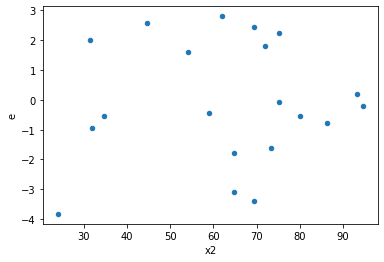

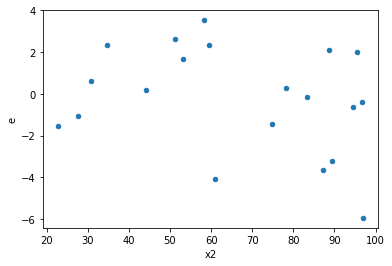

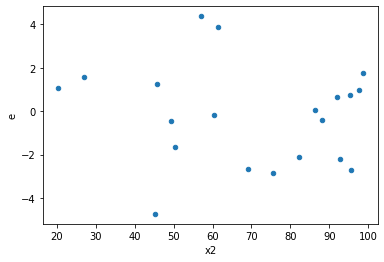

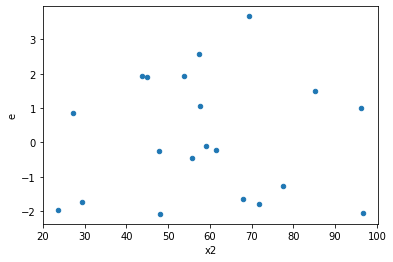

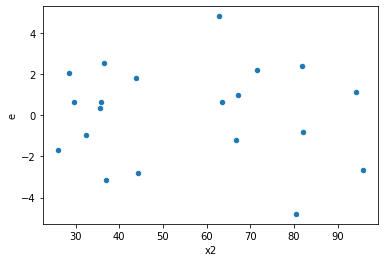

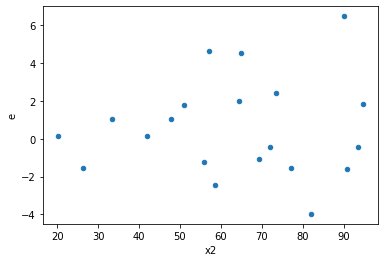

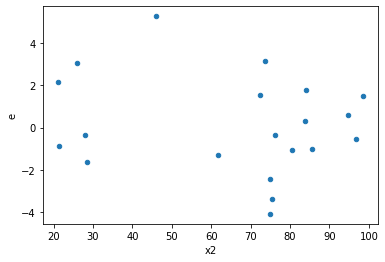

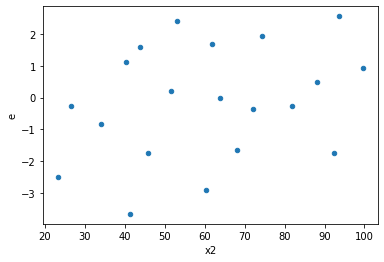

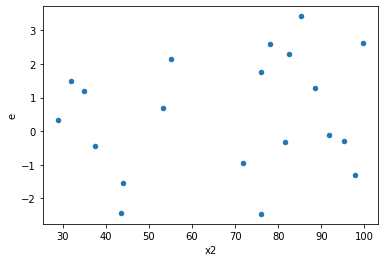

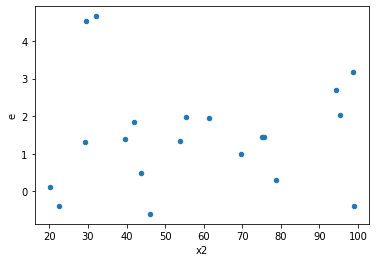

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,6.0,6.0,28.78646705448645,34.002270222929006,4.797744509081075,5.667045037154835,1.181189416491096,0.8449604959701986,0.5775197520149007,0.4224802479850993,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,5.4395296338772,17.348070387002632,0.9065882723128666,2.8913450645004386,3.189259284288012,0.18392819018179374,0.9080359049091031,0.09196409509089687,Reject001=1 : Homoscedasticity
9.0,6.0,6.0,10.684406077851946,11.000241976788503,1.7807343463086578,1.833373662798084,1.0295604544263124,0.9726945734421935,0.5136527132789033,0.4863472867210967,Reject001=1 : Homoscedasticity
10.0,6.0,6.0,17.52668056657561,39.48769664455776,2.921113427762602,6.581282774092959,2.253004868466826,0.346036239178497,0.8269818804107515,0.1730181195892485,Reject001=1 : Homoscedasticity
11.0,6.0,6.0,32.72697741527901,68.36693274072574,5.454496235879835,11.394488790120958,2.0890084615271487,0.39171008409305297,0.8041449579534735,0.19585504204652648,Reject001=1 : Homoscedasticity
12.0,6.0,6.0,4.590727517462691,44.41897871150276,0.7651212529104484,7.403163118583794,9.675803789821373,0.014214242614772887,0.9928928786926136,0.007107121307386444,Reject001=1 : Homoscedasticity
13.0,6.0,6.0,18.536941378220554,27.539897385484206,3.0894902297034257,4.589982897580701,1.4856764567341956,0.6428611801680628,0.6785694099159686,0.3214305900840314,Reject001=1 : Homoscedasticity
14.0,6.0,6.0,4.594611880364176,7.829767036358354,0.7657686467273627,1.3049611727263923,1.7041193555042466,0.5333926461883376,0.7333036769058312,0.2666963230941688,Reject001=1 : Homoscedasticity
15.0,6.0,6.0,17.843710858630896,19.889182078486414,2.973951809771816,3.3148636797477358,1.1146326140375749,0.8985566376935175,0.5507216811532413,0.44927831884675873,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,40.405149882525244,11.791570897847246,6.734191647087541,1.9652618163078743,0.2918333660964085,0.15950386369737454,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,27.557805043326816,23.243538144459066,4.592967507221136,3.873923024076511,0.8434466427175608,0.8415309466639875,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,66.99829946477803,15.991680057967322,11.16638324412967,2.6652800096612204,0.23868785007557364,0.10492523214769962,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,8.572082250795734,3.751955286774663,1.4286803751326225,0.6253258811291105,0.43769473705485895,0.3380126597283888,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,44.83358724486107,25.010139585730307,7.472264540810179,4.168356597621718,0.5578438202844682,0.49571623733189,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,28.78646705448645,34.002270222929006,4.797744509081075,5.667045037154835,1.181189416491096,0.8449604959701986,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,54.107532522784716,19.65844420299948,9.017922087130787,3.27640736716658,0.36332176476022626,0.24334915471464708,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,15.081005907516413,6.36995983271964,2.5135009845860687,1.06165997211994,0.4223829545444867,0.318148380559463,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,5.4395296338772,17.348070387002632,0.9065882723128666,2.8913450645004386,3.189259284288012,0.18392819018179374,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      971
Reject001=0 : Heteroscedasticity     29
Name: Result_test, dtype: int64